In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


형태소 분석기 비교 자료

<2018.12.10> 분석 자료

https://iostream.tistory.com/144


사용할 데이터의 특성(띄어쓰기 유무 등)이나 개발 환경에 따라서 적합한 형태소 분석기 고려 필요

연산 속도가 중요하담녀 mecab을 최우선으로 고려되며, 분석 품질 또한 상위권으로 보여짐

자소 분리나 오탈자에 대해서는 KOMORAN사용을 고려

한나눔과 Khaiii는 일부 케이스데 대한 분석 품질, 꼬꼬마는 분석 시간에서 아쉬운 점을 보임

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0.Projects/Naver Movie /ratings.txt', sep='\t')

In [4]:
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


## text preprocess - morphing

## with konlpy - tag : Okt, kkma

In [5]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 2.8MB/s 
     |████████████████████████████████| 2.7MB 29.9MB/s 


# Requires to install g++

In [23]:
!apt-get install g++ openjdk-8-jdk 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jre x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jre x11-utils
0 upgraded, 13 newly installed, 0 to remove and 8 not upgraded.
Need to get 7,119 kB of archives.
After this operation, 20.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 

In [0]:
from konlpy.tag import Okt, Kkma
import konlpy

## Start with Okt

In [0]:
okt = Okt()

In [8]:
sample_data = df.loc[0, 'document']
print(sample_data)

어릴때보고 지금다시봐도 재밌어요ㅋㅋ


In [9]:
okt_result = okt.pos(sample_data)

okt_result

[('어릴', 'Verb'),
 ('때', 'Noun'),
 ('보고', 'Noun'),
 ('지금', 'Noun'),
 ('다시', 'Noun'),
 ('봐도', 'Verb'),
 ('재밌어요', 'Adjective'),
 ('ㅋㅋ', 'KoreanParticle')]

In [0]:
okt.morphs(sample_data)

['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ']

In [0]:
okt.nouns(sample_data)

['때', '보고', '지금', '다시']

In [0]:
okt.phrases(sample_data)

['때보고', '때보고 지금다시', '보고', '지금', '다시']

In [0]:
okt.pos(sample_data, norm=True)

[('어릴', 'Verb'),
 ('때', 'Noun'),
 ('보고', 'Noun'),
 ('지금', 'Noun'),
 ('다시', 'Noun'),
 ('봐도', 'Verb'),
 ('재밌어요', 'Adjective'),
 ('ㅋㅋ', 'KoreanParticle')]

In [0]:
okt.pos(sample_data, stem=True)

[('어리다', 'Verb'),
 ('때', 'Noun'),
 ('보고', 'Noun'),
 ('지금', 'Noun'),
 ('다시', 'Noun'),
 ('보다', 'Verb'),
 ('재밌다', 'Adjective'),
 ('ㅋㅋ', 'KoreanParticle')]

In [0]:
okt.pos(sample_data, join=True)

['어릴/Verb',
 '때/Noun',
 '보고/Noun',
 '지금/Noun',
 '다시/Noun',
 '봐도/Verb',
 '재밌어요/Adjective',
 'ㅋㅋ/KoreanParticle']

In [0]:
sentence = []
counter = 0
for i in okt_result:
  print(i)
  result = i[0] + '<pos>' + i[1]
  print(result)
  
  sentence.append(result)
#   counter += 1
#   if counter == 1:
#     break

('어릴', 'Verb')
어릴<pos>Verb
('때', 'Noun')
때<pos>Noun
('보고', 'Noun')
보고<pos>Noun
('지금', 'Noun')
지금<pos>Noun
('다시', 'Noun')
다시<pos>Noun
('봐도', 'Verb')
봐도<pos>Verb
('재밌어요', 'Adjective')
재밌어요<pos>Adjective
('ㅋㅋ', 'KoreanParticle')
ㅋㅋ<pos>KoreanParticle


In [0]:
sentence

['어릴<pos>Verb',
 '때<pos>Noun',
 '보고<pos>Noun',
 '지금<pos>Noun',
 '다시<pos>Noun',
 '봐도<pos>Verb',
 '재밌어요<pos>Adjective',
 'ㅋㅋ<pos>KoreanParticle']

In [10]:
from keras.preprocessing import text

Using TensorFlow backend.


In [0]:
tokenizer = text.Tokenizer(lower=False, split=None,  filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')

In [0]:
tokenizer.fit_on_texts(sentence)

In [0]:
tokenizer.index_word

{1: '어릴<pos>Verb',
 2: '때<pos>Noun',
 3: '보고<pos>Noun',
 4: '지금<pos>Noun',
 5: '다시<pos>Noun',
 6: '봐도<pos>Verb',
 7: '재밌어요<pos>Adjective',
 8: 'ㅋㅋ<pos>KoreanParticle'}

In [0]:
# similar pattern as above, convert all text files

## End Sample 
------------------

In [11]:
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


# Toknizing Preprocess : 
## text -> preprocess -> Konlpy ->  preprocess -> concat_all-> Toknize -> convert to numeric

In [0]:
full_doc = df['document'].to_list()

In [0]:
okt = Okt()

In [0]:
def okt_pos(x):
  return okt.pos(x, join=True)

In [24]:
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [0]:
# convert to str is important

df['document'] = df['document'].apply(lambda x: str(x))

In [0]:
df['morph'] = df['document'].apply(okt_pos)

In [36]:
df.head()

,id,document,label,morph
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,"[어릴/Verb, 때/Noun, 보고/Noun, 지금/Noun, 다시/Noun, 봐..."
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,"[디자인/Noun, 을/Josa, 배우는/Verb, 학생/Noun, 으로/Josa,..."
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,"[폴리스스토리/Noun, 시리즈/Noun, 는/Josa, 1/Number, 부터/N..."
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,"[와/Verb, ../Punctuation, 연기/Noun, 가/Josa, 진짜/N..."
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,"[안개/Noun, 자욱한/Adjective, 밤하늘/Noun, 에/Josa, 떠/V..."


In [37]:
df['morph'].isna().sum()

0

In [38]:
df.morph.head()

0    [어릴/Verb, 때/Noun, 보고/Noun, 지금/Noun, 다시/Noun, 봐...
1    [디자인/Noun, 을/Josa, 배우는/Verb, 학생/Noun, 으로/Josa,...
2    [폴리스스토리/Noun, 시리즈/Noun, 는/Josa, 1/Number, 부터/N...
3    [와/Verb, ../Punctuation, 연기/Noun, 가/Josa, 진짜/N...
4    [안개/Noun, 자욱한/Adjective, 밤하늘/Noun, 에/Josa, 떠/V...
Name: morph, dtype: object

In [0]:
full_sentence_list = df.morph.to_list()

In [40]:
full_sentence_list

[['어릴/Verb',
  '때/Noun',
  '보고/Noun',
  '지금/Noun',
  '다시/Noun',
  '봐도/Verb',
  '재밌어요/Adjective',
  'ㅋㅋ/KoreanParticle'],
 ['디자인/Noun',
  '을/Josa',
  '배우는/Verb',
  '학생/Noun',
  '으로/Josa',
  ',/Punctuation',
  '외국/Noun',
  '디자이너/Noun',
  '와/Josa',
  '그/Noun',
  '들/Suffix',
  '이/Josa',
  '일군/Noun',
  '전통/Noun',
  '을/Josa',
  '통해/Noun',
  '발전/Noun',
  '해가는/Verb',
  '문화/Noun',
  '산업/Noun',
  '이/Josa',
  '부러웠는데/Adjective',
  './Punctuation',
  '사실/Noun',
  '우리나라/Noun',
  '에서도/Josa',
  '그/Noun',
  '어려운/Adjective',
  '시절/Noun',
  '에/Josa',
  '끝/Noun',
  '까지/Josa',
  '열정/Noun',
  '을/Josa',
  '지킨/Verb',
  '노라노/Noun',
  '같은/Adjective',
  '전통/Noun',
  '이/Josa',
  '있어/Adjective',
  '저/Noun',
  '와/Josa',
  '같은/Adjective',
  '사람/Noun',
  '들/Suffix',
  '이/Josa',
  '꿈/Noun',
  '을/Josa',
  '꾸고/Verb',
  '이뤄/Verb',
  '나갈/Verb',
  '수/Noun',
  '있다는/Adjective',
  '것/Noun',
  '에/Josa',
  '감사합니다/Verb',
  './Punctuation'],
 ['폴리스스토리/Noun',
  '시리즈/Noun',
  '는/Josa',
  '1/Number',
  '부터/Noun',
  '뉴/Noun',
  '까지/J

In [41]:
df.head()

,id,document,label,morph
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,"[어릴/Verb, 때/Noun, 보고/Noun, 지금/Noun, 다시/Noun, 봐..."
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,"[디자인/Noun, 을/Josa, 배우는/Verb, 학생/Noun, 으로/Josa,..."
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,"[폴리스스토리/Noun, 시리즈/Noun, 는/Josa, 1/Number, 부터/N..."
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,"[와/Verb, ../Punctuation, 연기/Noun, 가/Josa, 진짜/N..."
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,"[안개/Noun, 자욱한/Adjective, 밤하늘/Noun, 에/Josa, 떠/V..."


In [42]:
df.shape

(200000, 4)

In [0]:
morph_list = df['morph'].to_list()

In [45]:
morph_list

[['어릴/Verb',
  '때/Noun',
  '보고/Noun',
  '지금/Noun',
  '다시/Noun',
  '봐도/Verb',
  '재밌어요/Adjective',
  'ㅋㅋ/KoreanParticle'],
 ['디자인/Noun',
  '을/Josa',
  '배우는/Verb',
  '학생/Noun',
  '으로/Josa',
  ',/Punctuation',
  '외국/Noun',
  '디자이너/Noun',
  '와/Josa',
  '그/Noun',
  '들/Suffix',
  '이/Josa',
  '일군/Noun',
  '전통/Noun',
  '을/Josa',
  '통해/Noun',
  '발전/Noun',
  '해가는/Verb',
  '문화/Noun',
  '산업/Noun',
  '이/Josa',
  '부러웠는데/Adjective',
  './Punctuation',
  '사실/Noun',
  '우리나라/Noun',
  '에서도/Josa',
  '그/Noun',
  '어려운/Adjective',
  '시절/Noun',
  '에/Josa',
  '끝/Noun',
  '까지/Josa',
  '열정/Noun',
  '을/Josa',
  '지킨/Verb',
  '노라노/Noun',
  '같은/Adjective',
  '전통/Noun',
  '이/Josa',
  '있어/Adjective',
  '저/Noun',
  '와/Josa',
  '같은/Adjective',
  '사람/Noun',
  '들/Suffix',
  '이/Josa',
  '꿈/Noun',
  '을/Josa',
  '꾸고/Verb',
  '이뤄/Verb',
  '나갈/Verb',
  '수/Noun',
  '있다는/Adjective',
  '것/Noun',
  '에/Josa',
  '감사합니다/Verb',
  './Punctuation'],
 ['폴리스스토리/Noun',
  '시리즈/Noun',
  '는/Josa',
  '1/Number',
  '부터/Noun',
  '뉴/Noun',
  '까지/J

# Set the Tokenizer

## remove all funcuation

In [56]:
# to filter the puncuation, particle,  - requires to do before using konlpy
import re

test_words = ['../Punctuation','부럽습니다/Adjective',  '~~~~/Punctuation', 'ㅋㅋㅋㅋㅋ/KoreanParticle']

funtuation_included = re.compile('[!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n]+\/Punctuation')


for i in test_words :
  result = re.findall(funtuation_included, i)
  print(result)

['../Punctuation']
[]
['~~~~/Punctuation']
[]


In [0]:
test_toknizer = text.Tokenizer(lower=False, split=None, filters='')

In [0]:
test_toknizer.fit_on_texts(test_words)

In [63]:
test_toknizer.index_word

{1: '../Punctuation',
 2: '부럽습니다/Adjective',
 3: '~~~~/Punctuation',
 4: 'ㅋㅋㅋㅋㅋ/KoreanParticle'}

In [0]:
tokenizer = text.Tokenizer(lower=False, split=None,  filters='')  

In [0]:
tokenizer.fit_on_texts(morph_list)

In [66]:
tokenizer.index_word

{1: './Punctuation',
 2: '영화/Noun',
 3: '이/Josa',
 4: '의/Josa',
 5: '../Punctuation',
 6: '가/Josa',
 7: '에/Josa',
 8: '을/Josa',
 9: '.../Punctuation',
 10: '도/Josa',
 11: '들/Suffix',
 12: ',/Punctuation',
 13: '는/Josa',
 14: '를/Josa',
 15: '은/Josa',
 16: '너무/Adverb',
 17: '?/Punctuation',
 18: '정말/Noun',
 19: '진짜/Noun',
 20: '!/Punctuation',
 21: '이/Determiner',
 22: '적/Suffix',
 23: '이/Noun',
 24: '점/Noun',
 25: '으로/Josa',
 26: '로/Josa',
 27: '에서/Josa',
 28: '만/Josa',
 29: '연기/Noun',
 30: '평점/Noun',
 31: '것/Noun',
 32: '과/Josa',
 33: '최고/Noun',
 34: '~/Punctuation',
 35: '한/Josa',
 36: '생각/Noun',
 37: '스토리/Noun',
 38: '인/Josa',
 39: '왜/Noun',
 40: '다/Adverb',
 41: '..../Punctuation',
 42: '다/Josa',
 43: '드라마/Noun',
 44: '이다/Josa',
 45: '감동/Noun',
 46: '사람/Noun',
 47: '1/Number',
 48: '하는/Verb',
 49: '보고/Noun',
 50: '말/Noun',
 51: '더/Noun',
 52: '때/Noun',
 53: '내/Noun',
 54: 'ㅋㅋ/KoreanParticle',
 55: '배우/Noun',
 56: '와/Josa',
 57: '감독/Noun',
 58: '거/Noun',
 59: '고/Josa',
 60: '내용/Noun'

In [67]:
len(tokenizer.index_word)

123884

In [0]:
sentence_to_seq = tokenizer.texts_to_sequences(df['morph'])

In [70]:
sentence_to_seq

[[506, 52, 49, 115, 89, 125, 378, 54],
 [4770,
  8,
  2522,
  1753,
  25,
  12,
  1645,
  10473,
  56,
  66,
  11,
  3,
  56590,
  6369,
  8,
  1118,
  1592,
  10474,
  1329,
  8315,
  3,
  56591,
  1,
  440,
  419,
  819,
  66,
  1916,
  637,
  7,
  128,
  65,
  1646,
  8,
  21816,
  56592,
  99,
  6369,
  3,
  808,
  205,
  56,
  99,
  46,
  11,
  3,
  670,
  8,
  15615,
  16766,
  5251,
  77,
  1318,
  31,
  7,
  1193,
  1],
 [10060, 266, 13, 47, 1246, 6120, 65, 56593, 90, 10, 300, 5, 33, 1],
 [195,
  5,
  29,
  6,
  19,
  131,
  56594,
  5,
  56595,
  36,
  319,
  316,
  152,
  225,
  5,
  1306,
  1234,
  19,
  2,
  119],
 [8316, 40638, 21817, 7, 5499, 104, 40639, 99, 2, 1],
 [80, 8, 3864, 46, 3, 489, 106, 181, 128, 65, 11376, 104, 2],
 [101, 45, 102, 89, 125, 45],
 [131, 11, 4, 530, 100, 8108, 17, 1686, 47, 3396, 26, 49, 4017],
 [262],
 [980, 6, 332, 1456, 9107, 3360],
 [53,
  690,
  56,
  99,
  2,
  14,
  115,
  96,
  79,
  13,
  45,
  22,
  44,
  5,
  213,
  9725,
  89,
  56596,

In [71]:
len(sentence_to_seq)

200000

In [0]:
from keras.preprocessing import sequence

In [0]:
pad_result = sequence.pad_sequences(sentence_to_seq, maxlen=2000, padding='post')

In [74]:
pad_result

array([[   506,     52,     49, ...,      0,      0,      0],
       [  4770,      8,   2522, ...,      0,      0,      0],
       [ 10060,    266,     13, ...,      0,      0,      0],
       ...,
       [   101,   3984,      2, ...,      0,      0,      0],
       [    39,    933, 123884, ...,      0,      0,      0],
       [  2914,   2572,   7871, ...,      0,      0,      0]], dtype=int32)

In [75]:
pad_result.shape

(200000, 2000)

In [76]:
import gc

gc.collect()

0

In [0]:
target = df['label'].values

In [0]:
# del morph_list
# del sentence_to_seq
# del full_doc
# del df

### pad_result : 형태소 분석을 통한 토큰화 진행 및 언어 인덱싱

### target = df.label 



### sentimental analysis 진행 후 장르 관련 문제로 

## 1: Bidirecitonal LSTM / Conv1D / max & avg pool / concat / Dense

In [0]:
from keras import models, layers
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(pad_result, target, test_size=0.2, random_state=1228)

In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160000, 2000)
(40000, 2000)
(160000,)
(40000,)


In [81]:
x_train

array([[18330,  4692,   954, ...,     0,     0,     0],
       [  419,  4257,     3, ...,     0,     0,     0],
       [  783,   125,   521, ...,     0,     0,     0],
       ...,
       [13718,    19,   110, ...,     0,     0,     0],
       [   98,     2,  1970, ...,     0,     0,     0],
       [  245,    47,   744, ...,     0,     0,     0]], dtype=int32)

In [82]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [0]:
token_length = len(tokenizer.index_word)

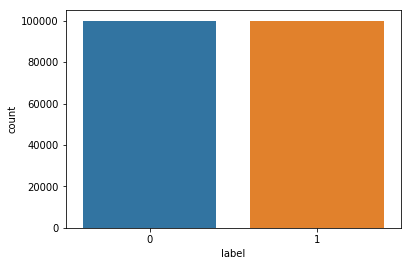

In [0]:
sns.countplot(df['label'])

In [84]:
token_length

123884

In [0]:
input_tensor = layers.Input(shape = (2000, ))

x_emb = layers.Embedding(token_length+1, 100)(input_tensor)
x = layers.SpatialDropout1D(0.4)(x_emb)
x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x_emb)
x = layers.Conv1D(256, 7, padding='same', activation='relu')(x)
x_1 = layers.GlobalAveragePooling1D()(x)
x_2 = layers.GlobalMaxPooling1D()(x)
x_concat = layers.Concatenate(axis=-1)([x_1, x_2])
x_out = layers.Dense(128, activation='relu')(x_concat)
output = layers.Dense(1, activation='sigmoid')(x_out)

model = models.Model(input_tensor, output)


In [91]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 2000)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 2000, 100)    12388500    input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 2000, 512)    731136      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 2000, 256)    917760      bidirectional_2[0][0]            
____________________________________________________________________________________________

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
from keras import callbacks as k_callbacks
from tensorboardcolab import *

In [96]:
tbc = TensorBoardColab(startup_waiting_time=15)

Wait for 15 seconds...
TensorBoard link:
https://77403b65.ngrok.io


In [0]:
call_lr = k_callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience=3, verbose=1)
call_cp = k_callbacks.ModelCheckpoint('naver_sentiment.h5', monitor='val_loss', save_best_only=True)
call_tb = TensorBoardColabCallback(tbc)

In [0]:
import tensorflow as tf

In [99]:
history = model.fit(x_train, y_train, batch_size=128, epochs = 100, validation_data = (x_test, y_test), callbacks=[call_lr, call_cp])

Train on 160000 samples, validate on 40000 samples
Epoch 1/100
160000/160000 [==============================] - 14471s 90ms/step - loss: 0.3513 - acc: 0.8442 - val_loss: 0.3157 - val_acc: 0.8616
Epoch 2/100
160000/160000 [==============================] - 14543s 91ms/step - loss: 0.2175 - acc: 0.9131 - val_loss: 0.3376 - val_acc: 0.8641
Epoch 3/100
   128/160000 [..............................] - ETA: 3:42:12 - loss: 0.1098 - acc: 0.9531

KeyboardInterrupt: ignored

## Test with any sentece to predict

In [124]:
# label :
# 1 = Positive
# 0 = Negative


test_predict = '정말 재미 드럽게 없다'

morphed = okt.pos(test_predict, join=True)


morphed_token = tokenizer.texts_to_sequences(morphed)

full_morphed = []
for num in morphed_token:
  for i in num:
    full_morphed.append(i)
    

morphed_pad = sequence.pad_sequences([full_morphed], 2000, padding='post')
morphed_pad

morphed_predict = model.predict(morphed_pad)


morphed_predict

array([[0.00484568]], dtype=float32)

## 1: Conv1D / Bidirecitonal LSTM / max & avg pool / concat / Dense

In [0]:
input_tensor = layers.Input(shape = (2000, ))

x_emb = layers.Embedding(token_length+1, 100)(input_tensor)
x = layers.SpatialDropout1D(0.4)(x_emb)
x = layers.Conv1D(256, 7, padding='same', activation='relu')(x)
x = layers.Bidirectional(layers.CuDNNLSTM(256))(x)

x_out = layers.Dense(128, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x_out)

model = models.Model(input_tensor, output)
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, batch_size=128, epochs = 100, validation_data = (x_test, y_test), callbacks=[call_lr, call_cp])

Train on 160000 samples, validate on 40000 samples
Epoch 1/100
   512/160000 [..............................] - ETA: 45:15 - loss: 0.6977 - acc: 0.4590